# Global Diet Composition Over Time: Analysis and Visualizations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go

from utils import europe, north_america, south_america, carribean_central_america, asia, africa, oceania, continents, diet_columns

pd.set_option('display.max_rows', None)

## Preprocessing

In [2]:
data = pd.read_csv("diet_composition.csv")
# source: FAO 2017 via OWID

In [3]:
print(f"Number of countries: {data.Entity.nunique()}")
print(f"Year range: {data.Year.min()}-{data.Year.max()}")

Number of countries: 173
Year range: 1961-2013


In [4]:
data = data.rename(columns={
    "Entity":                                                              "country",
    "Year":                                                                "year",
    "Cereals and Grains (FAO (2017)) (kilocalories per person per day)":   "cereals_grains",
    "Pulses (FAO (2017)) (kilocalories per person per day)":               "pulses", 
    "Starchy Roots (FAO (2017)) (kilocalories per person per day)":        "starchy_roots", 
    "Sugar (FAO (2017)) (kilocalories per person per day)":                "sugar", 
    "Oils & Fats (FAO (2017)) (kilocalories per person per day)":          "oils_fats", 
    "Meat (FAO (2017)) (kilocalories per person per day)":                 "meat", 
    "Dairy & Eggs (FAO (2017)) (kilocalories per person per day)":         "dairy_eggs", 
    "Fruit and Vegetables (FAO (2017)) (kilocalories per person per day)": "fruit_veg", 
    "Other (FAO (2017)) (kilocalories per person per day)":                "other", 
    "Alcoholic Beverages (FAO (2017)) (kilocalories per person per day)":  "alcohol", 
})

In [5]:
data.sample(5)

,country,year,cereals_grains,pulses,starchy_roots,sugar,oils_fats,meat,dairy_eggs,fruit_veg,other,alcohol
4104,Laos,1963,1677,25,27,11,37,70,7,36,17,39.0
4711,Malta,2013,1090,37,76,548,438,401,356,219,95,118.0
4482,Malawi,1996,1312,133,179,150,68,47,12,94,3,19.0
7504,Uganda,1969,620,206,420,134,260,81,47,360,10,217.0
7267,Togo,1966,809,89,950,47,186,59,8,32,13,38.0


In [6]:
data.dtypes

country            object
year                int64
cereals_grains      int64
pulses              int64
starchy_roots       int64
sugar               int64
oils_fats           int64
meat                int64
dairy_eggs          int64
fruit_veg           int64
other               int64
alcohol           float64
dtype: object

In [7]:
data.shape, data.drop_duplicates().shape

((8154, 12), (8154, 12))

In [8]:
conditions = [
    (data.country.isin(cont)) for cont in 
    [europe, north_america, south_america, carribean_central_america, asia, africa, oceania]
]
data["continent"] = np.select(conditions, continents)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,8154.0,1988.014962,15.384679,1961.0,1975.0,1989.0,2001.0,2013.0
cereals_grains,8154.0,1064.064753,356.279239,127.0,800.0,1039.0,1304.0,2530.0
pulses,8154.0,56.069046,51.150346,0.0,19.0,43.0,76.0,471.0
starchy_roots,8154.0,179.074197,211.449560,0.0,50.0,109.0,204.0,1421.0
sugar,8154.0,272.900049,152.690877,0.0,139.0,285.0,389.0,707.0
oils_fats,8154.0,357.627545,189.965492,13.0,217.0,329.0,468.0,1053.0
meat,8154.0,220.173412,157.937054,16.0,89.0,174.0,328.0,793.0
dairy_eggs,8154.0,170.550527,138.159514,0.0,49.0,140.0,266.0,696.0
fruit_veg,8154.0,149.544395,97.050870,4.0,81.0,132.0,196.0,772.0
other,8154.0,28.833211,25.593864,-1.0,12.0,21.0,36.0,190.0


In [10]:
data["other"] = data["other"].replace(to_replace=-1, value=0)

In [11]:
data.isnull().sum()

country            0
year               0
cereals_grains     0
pulses             0
starchy_roots      0
sugar              0
oils_fats          0
meat               0
dairy_eggs         0
fruit_veg          0
other              0
alcohol           53
continent          0
dtype: int64

In [12]:
data[data['alcohol'].isnull()].iloc[0]

country           United Arab Emirates
year                              1961
cereals_grains                    1325
pulses                               0
starchy_roots                        0
sugar                              346
oils_fats                          443
meat                               389
dairy_eggs                         276
fruit_veg                           71
other                               41
alcohol                            NaN
continent                         Asia
Name: 7571, dtype: object

In [14]:
close_by_countries = ["Iraq", "Iran", "Yemen", "Oman", "Saudi Arabia", "Kuwait"]
data[(data["year"] == 2013) & (data["country"].isin(close_by_countries))][["country", "alcohol"]]

,country,alcohol
3527,Iran,0.0
3580,Iraq,5.0
4079,Kuwait,0.0
5666,Oman,5.0
6483,Saudi Arabia,0.0
8047,Yemen,1.0


In [15]:
# fill NaN values for alcohol consumption in United Arab Emirates with yearly median of surrounding countries 
median_alcohol_calories = data[data["country"].isin(close_by_countries)].groupby(data["year"])["alcohol"].median().tolist()
nan_indices = list(data[data["alcohol"].isnull()].index)
data.loc[nan_indices, "alcohol"] = median_alcohol_calories

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,8154.0,1988.014962,15.384679,1961.0,1975.00,1989.0,2001.0,2013.0
cereals_grains,8154.0,1064.064753,356.279239,127.0,800.00,1039.0,1304.0,2530.0
pulses,8154.0,56.069046,51.150346,0.0,19.00,43.0,76.0,471.0
starchy_roots,8154.0,179.074197,211.449560,0.0,50.00,109.0,204.0,1421.0
sugar,8154.0,272.900049,152.690877,0.0,139.00,285.0,389.0,707.0
oils_fats,8154.0,357.627545,189.965492,13.0,217.00,329.0,468.0,1053.0
meat,8154.0,220.173412,157.937054,16.0,89.00,174.0,328.0,793.0
dairy_eggs,8154.0,170.550527,138.159514,0.0,49.00,140.0,266.0,696.0
fruit_veg,8154.0,149.544395,97.050870,4.0,81.00,132.0,196.0,772.0
other,8154.0,28.833456,25.593583,0.0,12.00,21.0,36.0,190.0


## Daily calorie consumption per person in Europe (1961-2013)

In [17]:
data["total"] = data[diet_columns].sum(axis=1)

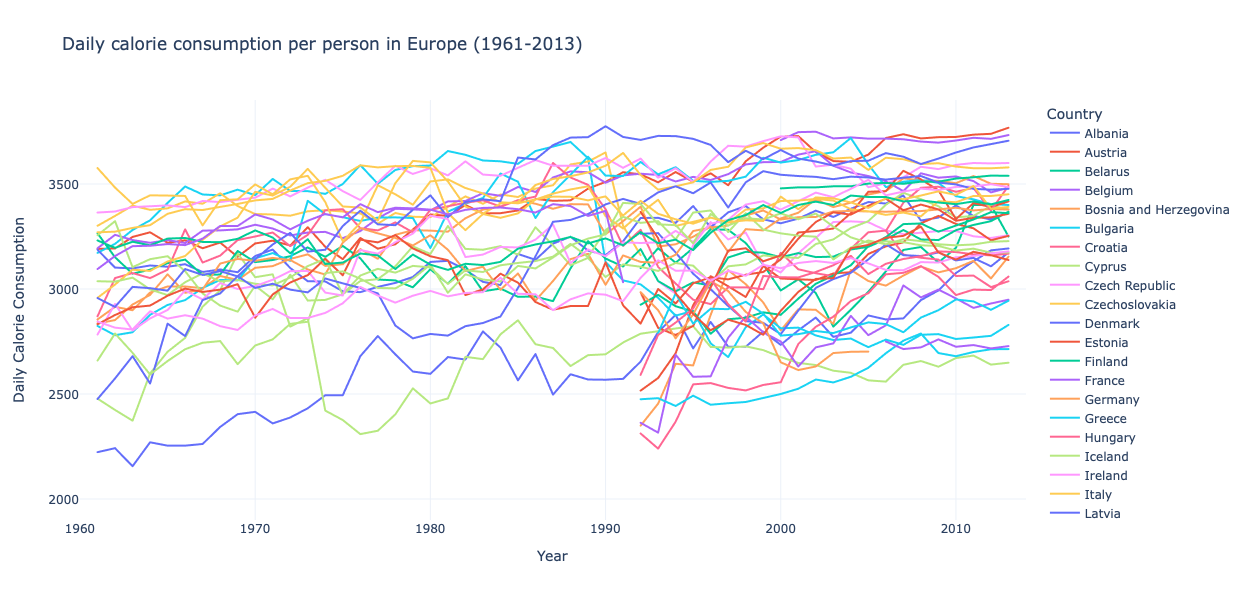

In [121]:
calory_consumption_europe = data.query('continent == "Europe"')

fig = px.line(calory_consumption_europe, 
              x="year", 
              y="total", 
              color="country",
              title="Daily calorie consumption per person in Europe (1961-2013)",
              labels={
                  "country": "Country", 
                  "total": "Daily Calorie Consumption", 
                  "year": "Year"
              },
              height=600,
              width=1200,
              template="plotly_white",
             )

fig.update_xaxes(range=[1960, 2014])
fig.update_yaxes(range=[1900, 3900])

fig.show()

### Noteworthy
- Virtually all European countries saw an increase in daily calorie consumption between 1961 and 2013.
- The three countries with the most daily calorie intake per person in 2013 are Austria (3768), Belgium (3733) and Turkey (3706), while the three countries with the lowest one are Serbia (2728, Moldova (2714) and Cyprus (2649) - that's a difference of about 1000 kcal per person and day! 
- Out of the three countries with the lowest calorie intake in 1961, Portugal and Albania increased theirs and now lie in the middle, while Cyprus remains on of the European country with the lowest calorie consumption.

## Diet 1961 vs. 2013 in Europe

In [29]:
europe_1961_2013 = data[(data.continent == "Europe") & (data.year.isin([1961, 2013]))].reset_index()
select_countries = [
    country for country in list(europe_1961_2013["country"].unique()) 
    if europe_1961_2013[europe_1961_2013["country"] == country]["country"].value_counts().item() == 2
]
select_europe_1961_2013 = europe_1961_2013.query("country in @select_countries")

plot_data = {"total": [], "country": [], "years": [], "colors": []}

for country in select_countries:
    plot_data["total"].extend(
    [
        select_europe_1961_2013.loc[(select_europe_1961_2013.year == 1961) & (select_europe_1961_2013.country == country)]["total"].values[0],
        select_europe_1961_2013.loc[(select_europe_1961_2013.year == 2013) & (select_europe_1961_2013.country == country)]["total"].values[0],
        None
    ])
    plot_data["country"].extend([country, country, None])
    plot_data["colors"].extend(["lightseagreen", "lightcoral", "brown"])
    plot_data["years"].extend(["1961", "2013", None])

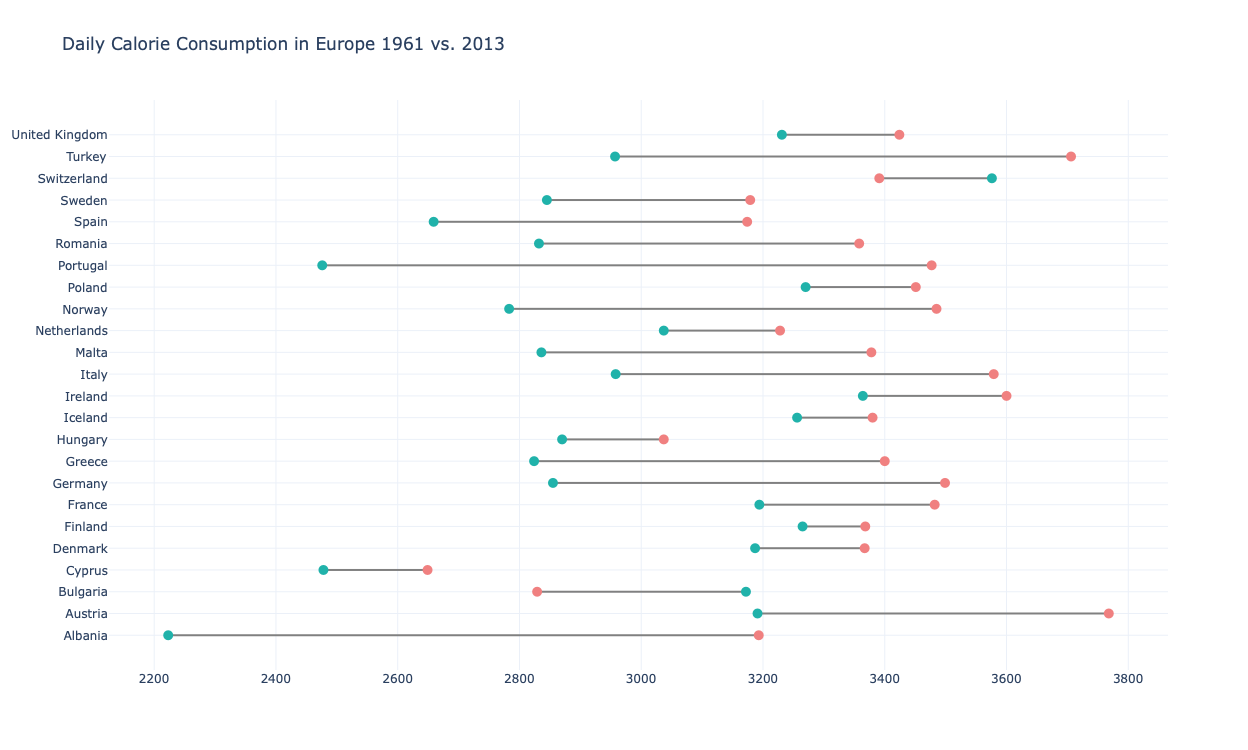

In [108]:
fig = go.Figure(
    data=[
        go.Scatter(
            x=plot_data["total"],
            y=plot_data["country"],
            mode="lines",
            marker=dict(
                color="grey",
            ),
        ),
        go.Scatter(
            x=plot_data["total"],
            y=plot_data["country"],
            mode="markers+text",
            marker=dict(
                color=plot_data["colors"],
                size=10,
            ),
            hovertemplate="""%{y}: %{x} kcal <br><extra></extra>""",
        ),
    ]
)

fig.update_layout(
    title="Daily Calorie Consumption in Europe 1961 vs. 2013",
    height=750,
    width=750,
    showlegend=False,
    template="plotly_white",
)

fig.show()

### Noteworthy
The points made below the previous plot are further underlined in this plot:
- Albania and Portugal saw the highest increase in daily calorie intake between 1961 and 2013, followed by Turkey.
- The two countries that in 2013 have a lower daily calorie intake per person than in 1961 are Switzerland (3576 -> 3391) and Bulgaria (from 3172 -> 2829), while all other countries saw an increase of their daily calorie intake.

## Median daily calorie consumption per person per continent (1961-2013)

In [33]:
median_calories_per_continent = data.groupby(["continent", "year"])["total"].apply(np.median)
df_median_calories_per_continent = pd.DataFrame(median_calories_per_continent).reset_index()

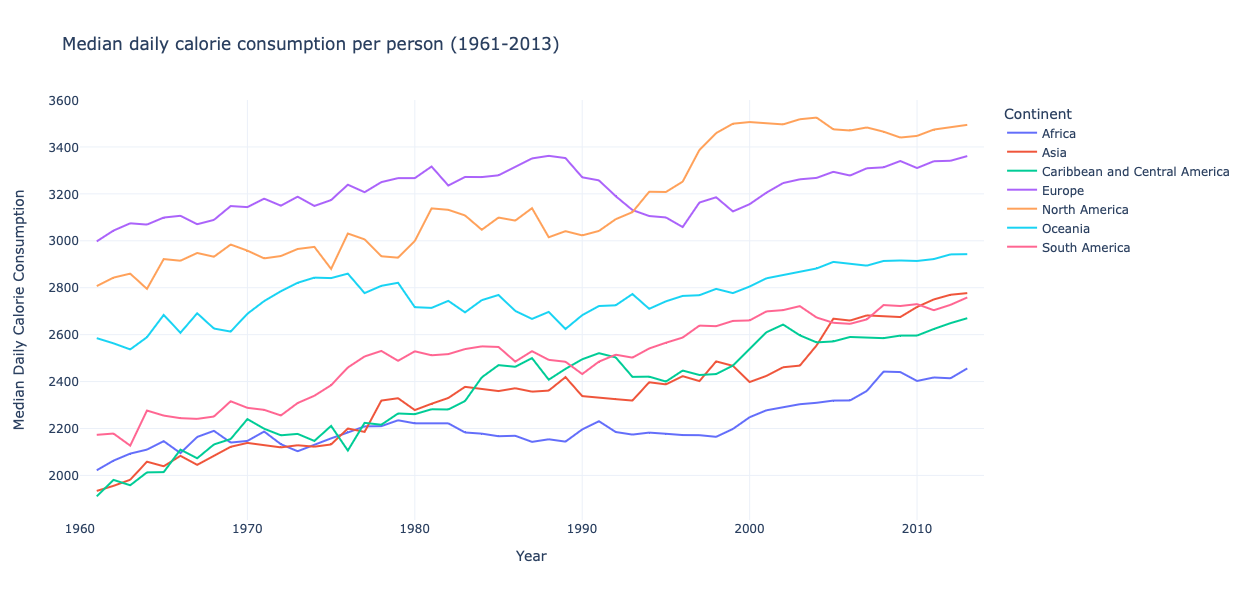

In [109]:
fig = px.line(df_median_calories_per_continent, 
              x="year", 
              y="total", 
              title="Median daily calorie consumption per person (1961-2013)",
              height=600,
              width=1200,
              color="continent",
              template="plotly_white",
             )

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Median Daily Calorie Consumption",
    legend={"title": {"text": "Continent"}},
    hovermode="x"
)
fig.update_traces(hovertemplate='%{y:.0f} kcal')

fig.update_xaxes(range=[1960, 2014])
fig.update_yaxes(range=[1810, 3600])

fig.show()

### Noteworthy
- All continents saw an increase in median daily calory intake between 1961 and 2013.
- North America overtook Europe in 1993 and is now the top continent regarding daily calory intake (3494 kcal)
- While in 1961 there was a clear divide between Europe/North America/Oceania and Asia/Africa/Caribbean and Central America/SouthAmerica, in 2013 continents can be grouped into Europe/North America, Oceania/Asia/South America/Caribbean and Central America, and Africa

## Ratio or calories coming from plants vs. animals

In [54]:
# leave out "oils_fat" (include both plants and animals), "other", and "alcohol"
plants = ["cereals_grains", "pulses", "starchy_roots", "sugar", "fruit_veg"]
animals = ["meat", "dairy_eggs"]

data["animal_based"] = data[animals].sum(axis=1)
data["plant_based"] = data[plants].sum(axis=1)
data["animal_and_plant_based"] = data[plants + animals].sum(axis=1)

plant_ratio = data.assign(plant_ratio = lambda row: (row["plant_based"] / row["animal_and_plant_based"] * 100))

data["plant_ratio"] = plant_ratio["plant_ratio"]

median_plant_ratio_per_continent = data.groupby(["continent", "year"])["plant_ratio"].apply(np.median)
df_median_plant_ratio_per_continent = pd.DataFrame(median_plant_ratio_per_continent).reset_index()

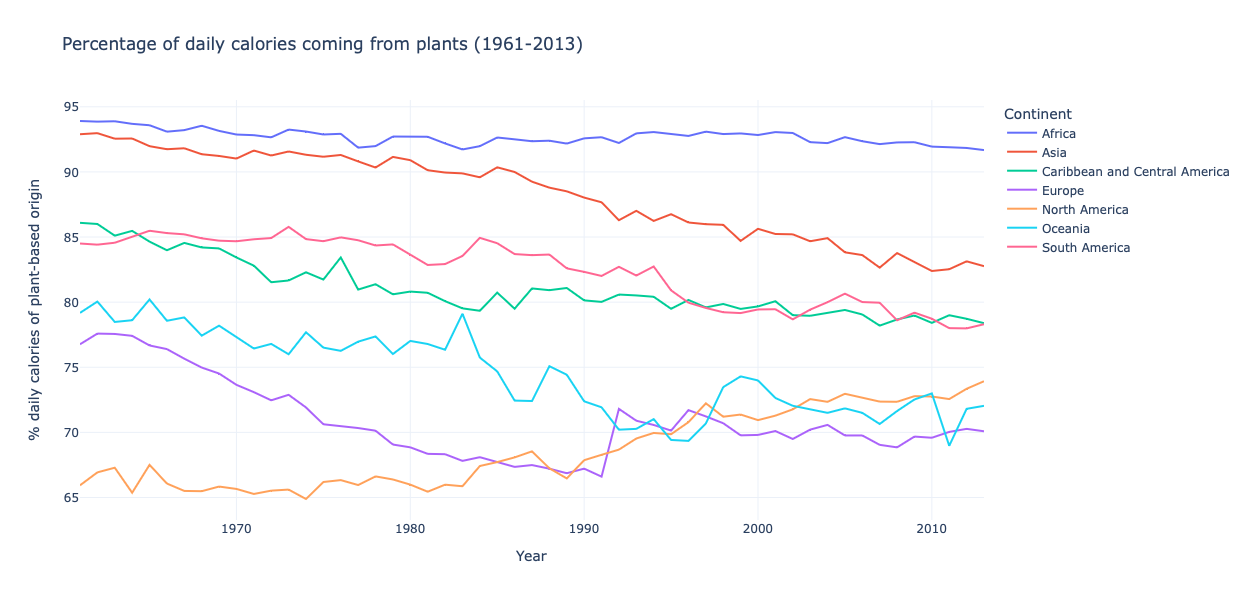

In [123]:
fig = px.line(df_median_plant_ratio_per_continent, 
              x="year", 
              y="plant_ratio", 
              title="Percentage of daily calories coming from plants (1961-2013)",
              height=600,
              width=1200,
              color="continent",
              template="plotly_white",
              labels={
                  "continent": "Continent", 
                  "plant_ratio": "%", 
                  "year": "Year"
              },
             )

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="% daily calories of plant-based origin",
    legend={"title": {"text": "Continent"}},
    hovermode="x"
)
fig.update_traces(hovertemplate='%{y:.0f}%')

fig.show()

### Noteworthy
- North America is the only continent where the percentage of calories coming from plants has inccreased more or less consistenly over the years (from 65% to 73%)
- The sharp increase in Europe in 1992 is arguably due to incorrect or inconsistent measurement which can be attributed to the breakup of Yugoslavia and USSR.
- Europe saw a reduction in percentage of calories coming from plants until 1992, and from then on the number roughly stagnated after a sharp and short increase around 1992.
- While Africa's percentage of calories coming from plants stayed virtually the same, Asia - starting out from a very similar place in 1961 - has decreased its percentage from 93 to 83.